In [1]:
import xarray as xr
from virtualizarr import open_virtual_dataset

In [2]:
url = "s3://nsf-ncar-era5/e5.oper.an.pl/202407/e5.oper.an.pl.128_130_t.ll025sc.2024070300_2024070323.nc"
#url = "s3://nsf-ncar-era5/e5.oper.an.pl/194001/e5.oper.an.sfc.128_167_2t.ll025sc.1940010100_1940013123.nc"
so = dict(anon=True, default_fill_cache=False, default_cache_type="none")

In [3]:
ds = open_virtual_dataset(url, indexes={})
ds

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 24, level: 37, latitude: 721, longitude: 1440)
Coordinates:
    level      (level) float64 296B ManifestArray<shape=(37,), dtype=float64,...
    latitude   (latitude) float64 6kB ManifestArray<shape=(721,), dtype=float...
    longitude  (longitude) float64 12kB ManifestArray<shape=(1440,), dtype=fl...
    time       (time) int32 96B ManifestArray<shape=(24,), dtype=int32, chunk...
Data variables:
    utc_date   (time) int32 96B ManifestArray<shape=(24,), dtype=int32, chunk...
    T          (time, level, latitude, longitude) float32 4GB ManifestArray<s...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc53 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Fri 11 Oct 2024 09:42:59 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Oct 11 21:43:21 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

In [4]:
ds.virtualize.to_kerchunk('era5_2024070300_2024070323.json', format='json')

In [5]:
from icechunk import IcechunkStore, StorageConfig, StoreConfig, VirtualRefConfig
storage = StorageConfig.filesystem(str('era5_2024070300_2024070323'))
# TODO if icechunk exposed a synchronous version of .open then we wouldn't need to use asyncio.run here
# TODO is this the correct mode to use?
store = await IcechunkStore.open(storage=storage, mode="w", config=StoreConfig(
    virtual_ref_config=VirtualRefConfig.s3_anonymous(region='us-west-2'),
))
store

In [6]:
ds.virtualize.to_icechunk(store)

/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/zarr/core/metadata/v3.py:71: UserWarning: Codec 'numcodecs.shuffle' not configured in config. Selecting any implementation.
  out += (get_codec_class(name_parsed).from_dict(c),)
/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/numcodecs/zarr3.py:64: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  warn(
/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/zarr/core/metadata/v3.py:71: UserWarning: Codec 'numcodecs.zlib' not configured in config. Selecting any implementation.
  out += (get_codec_class(name_parsed).from_dict(c),)
/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/zarr/core/metadata/v3.py:71: UserWarning: Codec 'numcodecs.shuffle' not configured in config. Selecting any implem

In [7]:
from zarr.core.buffer import default_buffer_prototype

(await store.get('time/zarr.json', default_buffer_prototype())).to_bytes()

b'{"zarr_format":3,"node_type":"array","attributes":{"_ARRAY_DIMENSIONS":["time"],"calendar":"gregorian","long_name":"time","units":"hours since 1900-01-01 00:00:00"},"shape":[24],"data_type":"int32","chunk_grid":{"name":"regular","configuration":{"chunk_shape":[1024]}},"chunk_key_encoding":{"name":"default","configuration":{"separator":"/"}},"fill_value":0,"codecs":[{"name":"bytes","configuration":{"endian":"little"}},{"name":"numcodecs.shuffle","configuration":{"elementsize":4}},{"name":"numcodecs.zlib","configuration":{"level":1}}],"storage_transformers":[],"dimension_names":["time"]}'

In [9]:
store.commit(message="Initial commit")

ValueError: store error: unsuccessful repository operation: `cannot commit, no changes made to the repository`

In [10]:
[x async for x in store.list()]

['zarr.json',
 'T/zarr.json',
 'latitude/zarr.json',
 'level/zarr.json',
 'longitude/zarr.json',
 'time/zarr.json',
 'utc_date/zarr.json',
 'T/c/0/0/0/0',
 'T/c/1/0/0/0',
 'T/c/2/0/0/0',
 'T/c/3/0/0/0',
 'T/c/4/0/0/0',
 'T/c/5/0/0/0',
 'T/c/6/0/0/0',
 'T/c/7/0/0/0',
 'T/c/8/0/0/0',
 'T/c/9/0/0/0',
 'T/c/10/0/0/0',
 'T/c/11/0/0/0',
 'T/c/12/0/0/0',
 'T/c/13/0/0/0',
 'T/c/14/0/0/0',
 'T/c/15/0/0/0',
 'T/c/16/0/0/0',
 'T/c/17/0/0/0',
 'T/c/18/0/0/0',
 'T/c/19/0/0/0',
 'T/c/20/0/0/0',
 'T/c/21/0/0/0',
 'T/c/22/0/0/0',
 'T/c/23/0/0/0',
 'T/c/0',
 'T/c/0',
 'T/c/0',
 'T/c/0',
 'T/c/0',
 'latitude/c/0',
 'latitude/c/0',
 'latitude/c/0',
 'latitude/c/0',
 'level/c/0',
 'level/c/0',
 'longitude/c/0',
 'longitude/c/0',
 'longitude/c/0',
 'longitude/c/0',
 'longitude/c/0',
 'time/c/0',
 'time/c/0',
 'time/c/0',
 'utc_date/c/0']

In [11]:
ds = xr.open_zarr(store, zarr_version=3, consolidated=False)
ds

/var/folders/42/2n_m99nx043g08tcp0krm4fw0000gn/T/ipykernel_23884/2983659458.py:1: FutureWarning: zarr_version is deprecated, use zarr_format
  ds = xr.open_zarr(store, zarr_version=3, consolidated=False)
/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/zarr/core/metadata/v3.py:71: UserWarning: Codec 'numcodecs.shuffle' not configured in config. Selecting any implementation.
  out += (get_codec_class(name_parsed).from_dict(c),)
/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/numcodecs/zarr3.py:64: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  warn(
/Users/matthew.earthmover/Developer/icechunk-xarray-demos/.venv/lib/python3.11/site-packages/zarr/core/metadata/v3.py:71: UserWarning: Codec 'numcodecs.zlib' not configured in config. Selecting any implementation.
  out += (get_codec_class(name_parsed).from_dict(c),)
/Us

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 24, longitude: 1440, level: 37, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 192B 2024-07-03 ... 2024-07-03T23:00:00
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) float64 296B 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    T          (time, level, latitude, longitude) float32 4GB ...
    utc_date   (time) int32 96B ...
Attributes:
    CONVERSION_DATE:      Fri 11 Oct 2024 09:42:59 PM MDT
    CONVERSION_PLATFORM:  Linux crhtc53 5.14.21-150400.24.46-default #1 SMP P...
    Conventions:          CF-1.6
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    history:              Fri Oct 11 21:43:21 2024: ncks -4 -L 1 --baa=0 --pp...

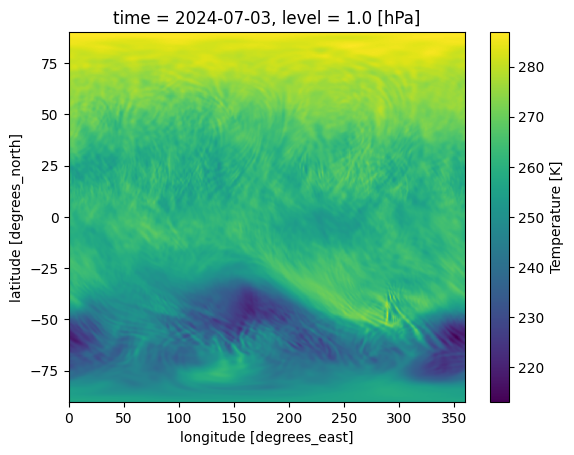

In [12]:
ds.T.isel(time=0, level=0).plot()